# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> 2º Trabalho Prático (Parte-A) </center>
# </br>


Trabalho realizado por:
* Alexandre Ferreira, numero <b> 47485 </b>
* João Maria Gonçalves, numero <b> 47507 </b>
* Henrique Matos, numero <b> 48608 </b>

A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

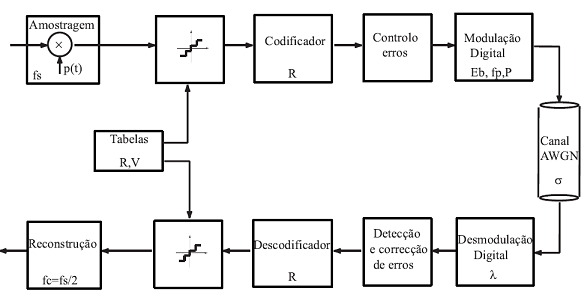


O 2º trabalho (parte-A) foca o desenvolvimento dos blocos Modulação e desmodulação Digital e com estes é terminado o desenvolvimento de todo o sistema de transmissão digital.



Considere as funções criadas nos trabalhos anteriores.

Construa uma função que simule a modulação digital 16-PSK.
Esta função recebe como parâmetro de entrada um array de bits e retorna um array, simulando o sinal analógico modulado a transmitir. Dado que o sinal modulado é simulado (um sinal discreto), é necessário que a função ainda receba como parâmetros de entrada o número de pontos por cada símbolo ($P=8$), simulando a amostragem. Esta função recebe ainda a energia média por bit ($E_b$). Admita que a frequência da portadora é tal que cada simbolo contém um período da portadora.


In [1]:
#IMPORTS

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Nota-se que faltava enviar o parâmetro da Energia de Bit para a função no código base fornecido.
def mod_QPSK(bits, Eb, P=8):
    nbits = 4 # QPSK implica 2 bits por símbolo

    # Começamos por confirmar se o array enviado tem as dimensões corretas,
    # adicionando um padding em caso negativo.
    if (len(bits)%2 != 0): # Para isto, basta confirmar se o seu comprimento é par.
        bits = np.insert(bits,0,[0])

    t  = np.arange(0, P)            # Sendo P o número de pontos por cada símbolo, fazemos um arrange de 0 a P.
    Ts = 8
    nsimbolos = int(len(bits)/2) # total de bits / (num bits por símbolo)
    signal = np.zeros(nsimbolos * P)

    # Agora, para cada símbolo atribui-se uma fase.
    # No caso implementado:
    #           S00 =    Acos(2πt + 0)   --> Fase   0
    #           S01 =  Acos(2πt + π/2)   --> Fase  π/2
    #           S11 =    Acos(2πt + π)   --> Fase   π
    #           S10 = Acos(2πt + 3π/2)   --> Fase 3π/2  , nota-se que se numera seguindo a notação de Gray

    # Para QPSK:   Eb = (1/2) * A^2 * Tb <=> A = sqrt(2*Eb/Tb) <=> A = sqrt(2*Eb/Tb)
    for k in range(nsimbolos):
        if bits[0 + (k*2)] == 0 and bits[1 + (k*2)] == 0:
            signal[k*P:(k+1)*P] = np.sqrt(2/P*Eb)* np.cos(2*np.pi/Ts *t)
        elif bits[0 + (k*2)] == 0 and bits[1 + (k*2)] == 1:
            signal[k*P:(k+1)*P] = np.sqrt(2/P*Eb)*np.cos(2*np.pi/Ts *t+(np.pi/2))
        elif bits[0 + (k*2)] == 1 and bits[1 + (k*2)] == 1:
            signal[k*P:(k+1)*P] = np.sqrt(2/P*Eb)*np.cos(2*np.pi/Ts *t+np.pi)
        elif bits[0 + (k*2)] == 1 and bits[1 + (k*2)] == 0:
            signal[k*P:(k+1)*P] = np.sqrt(2/P*Eb)*np.cos(2*np.pi/Ts *t+(3*np.pi/2))
    return signal # Retorna-se o array com o sinal modulado.

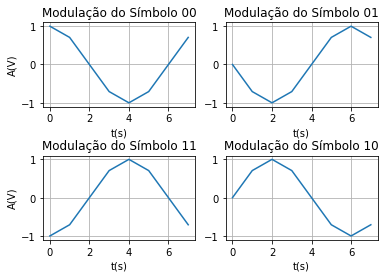

In [3]:
# TESTES À FUNÇÃO

# Começamos por verificar se cada símbolo é corretamente modulado.
Eb=4

# Divisão em 4 gráficos:
# Símbolo 00
plt.subplot(2, 2, 1)
plt.plot(mod_QPSK([0,0],Eb, 8))
plt.title("Modulação do Símbolo 00")
plt.ylabel("A(V)")
plt.xlabel("t(s)")
plt.grid()
plt.subplots_adjust(hspace = 0.58)

# Símbolo 01
plt.subplot(2, 2, 2)
plt.plot(mod_QPSK([0,1],Eb, 8))
plt.title("Modulação do Símbolo 01")
plt.xlabel("t(s)")
plt.grid()

# Símbolo 11
plt.subplot(2, 2, 3)
plt.plot(mod_QPSK([1,1],Eb, 8))
plt.title("Modulação do Símbolo 11")
plt.ylabel("A(V)")
plt.xlabel("t(s)")
plt.grid()

# Símbolo 10
plt.subplot(2, 2, 4)
plt.plot(mod_QPSK([1,0],Eb, 8))
plt.title("Modulação do Símbolo 10")
plt.xlabel("t(s)")
plt.grid()
plt.show()

# Vemos, nos gráficos abaixo, sinusoidais com diferentes fases.
# Reconhecemos, no gráfico superior esquerdo, uma função do tipo Acos(...),
# sem fase (ou fase = 0), o que vai de acordo com o esperado para o símbolo 00.
# À sua direita, vemos o mesmo gráfico deslocado para a esquerda por π/2, ou seja, fase π/2, conforme o símbolo 01.
# Com mais 2 deslocações de π/2 para a esquerda, obtemos a modulação dos símbolos 11 e 10, de acordo com o esperado.

Construa uma função que simule, no receptor, um filtro adaptado (desmodulação).
Este deve receber um array com o sinal modulado com ruído e deve retornar um array com a sequência binária correspondente.


In [4]:
def desmod_QPSK(signal, P = 8):
    # in: signal - nparray com as amplitudes do sinal modulado
    # P - n pontos por simbolo base

    # Fazemos os vetores base
    c1 = np.cos(2*np.pi/P * np.arange(0,P))
    c1 = c1/np.sqrt(np.sum(c1**2))
    c2 = np.sin( 2*np.pi/P * np.arange(0,P))
    c2 = c2/np.sqrt(np.sum(c2**2))

    bits = []
    componentes_x = []
    componentes_y = []

    for k in range(int(len(signal)/P)):
        x= np.sum(c1* signal[k*P:(k+1)*P])
        y= np.sum(c2* signal[k*P:(k+1)*P])

        componentes_x.append(x)
        componentes_y.append(y)

        # Parameterizamos cada região de decisão,
        # tendo em atenção a inversão do eixo vertical,
        # devido à polaridade do seno.
        if x > 0 and np.abs(y) < np.abs(x):
            bits.append(0)
            bits.append(0)
            #bits.append(0)
            #bits.append(0)
        elif y > 0 and y > np.abs(x):
            bits.append(1) #remover
            bits.append(0) #remover

            #bits.append(0)
            #bits.append(0)
            #bits.append(0)
            #bits.append(1)
        elif x < 0 and np.abs(y) < np.abs(x):
            #bits.append(0)
            #bits.append(0)
            bits.append(1)
            bits.append(1) #remover
            #bits.append(0)
        else:
            #bits.append(0)
            bits.append(0)
            bits.append(1)
            #bits.append(1)
    return bits, componentes_x, componentes_y

Considere que o canal segue o modelo de canal AWGN. 

Este pode ser implementado a partir da linha de código em baixo.  Recebe o sinal modulado (sinal_in), adiciona ruído, com uma determinada potência ${\sigma_n}^2$ (pot_noise) e devolve o sinal com ruído num array (sinal_out).

In [5]:
#CANAL AWGN
#sinal_out = sinal_in + np.sqrt(pot_noise) * np.random.randn( len(sinal_in) )

def awgn(sinal_in, pot_noise):
    return sinal_in + np.sqrt(pot_noise) * np.random.rand(len(sinal_in))

Construa uma função que calcule o BER teórico para a modulação implementada.

In [6]:
from scipy.special import erf # Import de uma biblioteca com a função erf,
# tendo em conta que 1-erf(x) = erfc(x).
def BER_teorico(Eb, No):
    k = 4 # nr bits
    m = 16 # MPSK
    # Com base na fórmula de BER nos formulários disponíveis, resulta:
    return 1/k * (1 - erf(np.sqrt(k * pow(np.sin(np.pi/m), 2)*(Eb/No))))

Avalie todo o sistema de emissão e receção. Para isso deve medir experimentalmente e comparar, sempre que possível, com os valores teóricos, os seguintes índices:

    A SNR no canal e SNR na recepção;
    
    BER antes e depois da correcção de erros;
    
    Apresente a constelação antes e depois do sinal passar pelo canal.

Para o efeito deve atribuir diferentes valores aos parâmetros do sistema e avalia-lo com e sem o modulo de correcção de erros.



## MÉTODOS COM BASE NOS TRABALHOS ANTERIORES -> ÍNICIO DO SISTEMA DE EMISSÃO E RECEÇÃO

In [7]:
## Quantificador inicial

def Quantific(R,Vmax,Qtype):
    L     = 2**R           # Número de caixas
    step  = (2*Vmax)/L     # Tamanho de cada caixa
    if (Qtype == 'midrise'):
        # np.linspace(limite inferior da caixa mais abaixo, limite superior da caixa mais acima, número de caixas + 1)
        Iq = np.linspace(-Vmax, Vmax, L+1)
        # np.linspace(centro da caixa mais abaixo, centro da caixa mais acima, número de caixas)
        Vq = np.linspace(-Vmax + step/2, Vmax - step/2, L)
    elif (Qtype == 'midtread'):
        Iq = np.linspace(-Vmax - step/2, Vmax - step/2, L+1) # Caixas deslocadas para baixo
        Iq[L] = Vmax
        Iq[0] = -Vmax
        Vq = np.linspace(-Vmax, Vmax-step, L)
        Vq[L-1] = (Iq[L] + Iq[L-1]) / 2
        Vq[0]   = (Iq[0] + Iq[1]) / 2
    else:
        return None, None
    return Vq, Iq

def Quantificador(x, Vq, Iq):
    # Usamos a função do numpy digitize que, dado um sinal e um array de "bins" ou contentores,
    # devolve o bin/contentor a que cada valor do array sinal pertence.
    # Olhando para Iq, vemos que o primeiro valor corresponde ao limite inferior (ou "da esquerda")
    # do contentor, apenas o último valor se trata de um limite da direita.
    # Assim, ignoramos esse valor (Iq[:-1]) e dizemos à função que se tratam dos valores da esquerda, right = False.
    iq = np.digitize(x, Iq[:-1], right=False)
    # De seguida, vamos ver qual o valor de quantificação correspondente a cada contentor.
    xq = Vq[iq-1]
    return xq, iq-1

def desquantificacao(indices, Vq):
    # Sendo enviados os bits em decimal (array índices)...
    desquant = ([Vq[indice] for indice in indices]) #    ... obtemos o valor de quantificação
    #          nos intervalos correspondentes.
    return desquant

In [8]:
# Medições dos SNR

def Measure_SNRp(x,y):
    erro = x-y
    Px = np.sum((x**2)/len(x))
    Pe = np.sum((erro**2)/ len(erro))
    SNRp = 10*np.log10(Px/Pe)
    return SNRp

def Measure_SNRt(R,Vmax,P):
    SNRt = 6.02*R + 10*np.log10(3*P/(Vmax**2))
    return SNRt

In [9]:
#Codif e Descodif

def Codific(arr_signal_quantized,R):
    arr_binary = []
    # Para cada valor...
    for valor in arr_signal_quantized:
        # Vamos fazer append dígito a dígito desse valor em binário, usando a função binary_repr(),
        # enviando o número de bits com que queremos codificar (width=R).
        arr_binary.append([int(a) for a in str(np.binary_repr(valor, width=R))])
    return np.concatenate(arr_binary) # Por fim, pomos tudo num array unidimensional.

def Descodific(arr_binary, R):
    # Começamos por separar o enviado em grupos de R bits cada, colocando um padding caso necessário,
    # ou seja, se não for possível separar a trama em grupos de R bits certos.
    if ((len(arr_binary) % R) != 0):
        # Usamos a função insert enviando:
        #   o array onde queremos inserir           - arr_binary
        #   o índice do array onde queremos inserir - No início da trama, índice 0
        #   aquilo que queremos inserir             - um array com (R-(Nª de valores que sobram ao dividir em grupos))
        arr_binary = np.insert(arr_binary, 0, np.zeros(R - (len(arr_binary) % R)))

    arr_binary = np.array_split(arr_binary, len(arr_binary)/R) # Divide-se em grupos de R elementos.
    # Por cada um desses sub arrays:
    #    ''.join vai juntar os dígitos formando uma única trama sem espaços  ('');
    #     int (valor, base) transforma esse valor na base desejada (2 neste caso);
    #     map() vai aplicar o comportamento das duas funções acima a todo o array;
    arr_signal = ([(int(''.join(map(str, b)),2)) for b in arr_binary])
    return arr_signal

G=np.array([[1,0,0,0,1,1,0,1],[0,1,0,0,1,0,1,1],[0,0,1,0,0,1,1,1],[0,0,0,1,1,1,1,0]])
HT=np.array([[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

# Hamming
def Hamming_8_4(arr_bits):
    # arr_bits   -> Será a trama a enviar,   com k=4 bits cada mensagem
    # arr_binary -> Será a trama codificada, com n=8 bits cada palavra

    # Começamos por separar o enviado em mensagems de 4 bits cada, colocando um padding caso necessário.
    if ((len(arr_bits) % 4) != 0): # O padding é necessário se não for possível separar a trama em grupos de 4 bits.
        # Inserimos zeros no começo de forma a prefazer os 4 bits de mensagem.
        # Usamos a função insert enviando:
        #   o array onde queremos inserir           - arr_bits
        #   o índice do array onde queremos inserir - No início da trama, índice 0
        #   aquilo que queremos inserir             - um array com (4-(Nª de valores que sobram ao dividir em grupos))
        arr_bits = np.insert(arr_bits, 0, np.zeros(4 - (len(arr_bits) % 4)))

    arr_bits_split   = np.array_split(arr_bits, len(arr_bits)/4) # Fazemos um split do array em mensagens de 4 bits.
    #print('Mensagens a enviar: ' + str(arr_bits_split))

    # A função np.dot permite efetuar a multiplicação entre matrizes.
    # Usamos %2 de forma a transformar os resultados em valores binários.
    arr_binary = np.array( np.dot(arr_bits_split, G)%2 ).tolist()
    return np.concatenate(arr_binary)

def Detetor(arr_binary):
    # arr_binary -> Será a trama recebida,  com n=8 bits cada palavra
    # arr_bits   -> Será a trama corrigida, com k=4 bits cada mensagem

    # Começamos por separar o enviado em palavras de 8 bits cada, colocando um padding caso necessário.
    if ((len(arr_binary) % 8) != 0): # O padding é necessário se não for possível separar a trama em grupos de 8 bits.
        # Inserimos zeros antes dos bits extra de forma a prefazer os 8 bits de código.
        # Usamos a função insert enviando:
        #   o array onde queremos inserir           - arr_binary
        #   o índice do array onde queremos inserir - No início da trama, índice 0
        #   aquilo que queremos inserir             - um array com (8-(Nª de valores que sobram ao dividir em grupos))
        arr_binary = np.insert(arr_binary, 0, np.zeros(8 - (len(arr_binary) % 8)))

    arr_binary_split = np.array_split(arr_binary, len(arr_binary)/8) # Fazemos um split do array em palavras de 8 bits.
    #print('Trama recebida: ' + str(arr_binary_split))

    # Agora, para cada palavra, vamos calular o síndroma.
    # O síndroma terá n-k bits, 4 no caso estudado. Multiplicamos matricialmente cada 8 bits da palavra
    # de código por HT.
    sindroma = np.array( np.dot(arr_binary_split, HT) % 2 ).tolist()

    arr_bits         = []
    # Tendo agora os síndromas, vamos comparar às linhas de HT, descobrindo o bit em erro, se este existir.
    for i in range (len(arr_binary_split)):
        palavra = arr_binary_split[i]
        for lin_index in range (8):
            if (np.array_equal(sindroma[i], HT[lin_index])):
                # Se o síndroma não for 0, será igual a uma das linhas de HT - troca-se, assim, o bit em erro, somando
                # ao erro (bit em erro + 1 em binário).
                palavra[lin_index] = np.bitwise_xor(palavra[lin_index], 1)

        arr_bits.append(palavra[:4]) # Guardamos os primeiros 4 bits, os bits da mensagem.
    return np.concatenate(arr_bits)


def BER_pratico(arr_bin_tx, arr_bin_rx):
    # Adição de padding à trama de menor comprimento pelo método já visto, de forma a que ambas
    # as tramas fiquem com o mesmo número de bits, caso não sejam assim enviadas para a função.
    if (len(arr_bin_tx) < len(arr_bin_rx)):
        arr_bin_tx = np.insert(arr_bin_tx, 0, np.zeros(len(arr_bin_rx)-len(arr_bin_tx)))
    if (len(arr_bin_rx) < len(arr_bin_tx)):
        arr_bin_rx = np.insert(arr_bin_rx, 0, np.zeros(len(arr_bin_tx)-len(arr_bin_rx)))

    # Subtraímos um array do outro usando np.subptract (que executa índice a índice e retorna
    # um array com a diferença obtida em cada um).
    diferencas  = np.subtract(arr_bin_tx, arr_bin_rx)
    # O comprimento (número de elementos) do array, quando se valoriza apenas os índices cujo conteúdo é
    # diferente de 0, indicam quantos erros se obtitiveram -> se for igual a 1, significa que os 2 bits
    # subtraídos não eram iguais.
    # Por fim, retorna-se esse valor dividido pelo número de bits enviado, conforme a fórmula.
    BER_pratico = len(diferencas[diferencas != 0]) / len(arr_bin_tx)
    return BER_pratico

Preparações de Testes

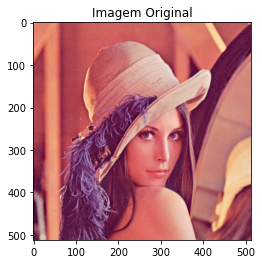

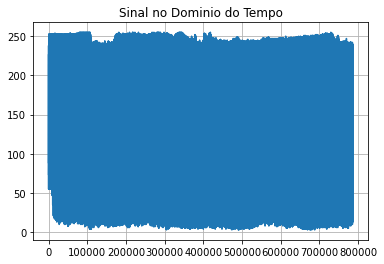

Text(0.5, 1.0, 'Espetro de Amplitude')

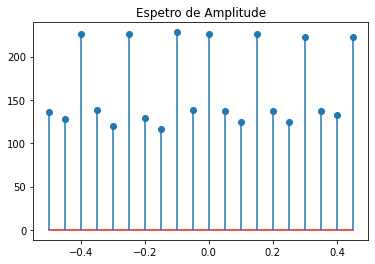

In [10]:
im = Image.open("lena_std.tif")
Q = 8
im_original = np.array(im).flatten();

SNRt = Measure_SNRt(Q, 256, np.sum(im_original**2 / len(im_original)))

plt.imshow(im)
plt.title("Imagem Original")
plt.show()

plt.plot(im_original)
plt.title("Sinal no Dominio do Tempo")
plt.grid()
plt.show()

X1 = np.fft.fft(im_original[0:20] / len(im_original[0:20]))
X1_abs = np.abs(im_original[0:20])
X1_fk = np.fft.fftfreq(len(im_original[0:20]))
plt.stem(X1_fk, X1_abs, use_line_collection=True)
plt.title("Espetro de Amplitude")

Valores de Quantificação: [-255. -253. -251. -249. -247. -245. -243. -241. -239. -237. -235. -233.
 -231. -229. -227. -225. -223. -221. -219. -217. -215. -213. -211. -209.
 -207. -205. -203. -201. -199. -197. -195. -193. -191. -189. -187. -185.
 -183. -181. -179. -177. -175. -173. -171. -169. -167. -165. -163. -161.
 -159. -157. -155. -153. -151. -149. -147. -145. -143. -141. -139. -137.
 -135. -133. -131. -129. -127. -125. -123. -121. -119. -117. -115. -113.
 -111. -109. -107. -105. -103. -101.  -99.  -97.  -95.  -93.  -91.  -89.
  -87.  -85.  -83.  -81.  -79.  -77.  -75.  -73.  -71.  -69.  -67.  -65.
  -63.  -61.  -59.  -57.  -55.  -53.  -51.  -49.  -47.  -45.  -43.  -41.
  -39.  -37.  -35.  -33.  -31.  -29.  -27.  -25.  -23.  -21.  -19.  -17.
  -15.  -13.  -11.   -9.   -7.   -5.   -3.   -1.    1.    3.    5.    7.
    9.   11.   13.   15.   17.   19.   21.   23.   25.   27.   29.   31.
   33.   35.   37.   39.   41.   43.   45.   47.   49.   51.   53.   55.
   57.   59.   61.   63. 

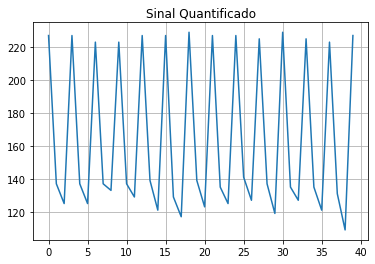

In [11]:
# Quantificador
Vq, Iq = Quantific(Q, 256, 'midrise')
print("Valores de Quantificação: " + str(Vq))

img_quantificada, indices = Quantificador(im_original, Vq, Iq)

print()
print("Valor em x(0): " + str(im_original[0]) + 'V')
print("Quantificação em x[0]: " + str(img_quantificada[0]) + 'V')
print("Indice em x[0]: " + str(indices[0]))

#Plot do sinal quantificado
plt.plot(img_quantificada[0:40])
plt.title("Sinal Quantificado")
plt.grid()
plt.show()

In [12]:
# Codificador

indices_codific = Codific(indices, Q)

print("Indice em x[0] decimal: " + str(indices[0]))
print("Indice em x[0] binario: " + "".join([str(v) for v in indices_codific[0:Q]]))
print("Indice em x[1] deciaml: " + str(indices[1]))
print("Indice em x[1] binario: " + "".join([str(v) for v in indices_codific[Q:2*Q]]))


Indice em x[0] decimal: 241
Indice em x[0] binario: 11110001
Indice em x[1] deciaml: 196
Indice em x[1] binario: 11000100


In [13]:
# Controlo Erros

indicesBinarios_Hamming = Hamming_8_4(indices_codific)
indicesBinarios_Hamming = np.array(indicesBinarios_Hamming).flatten()

print("Primeira mensagem a codificar: " +"".join([str(v) for v in indices_codific[0:4]]))
print("Primeio código por Hamming(8,4): " + "".join([str(v) for v in indicesBinarios_Hamming[0:8]]))

Primeira mensagem a codificar: 1111
Primeio código por Hamming(8,4): 11111111


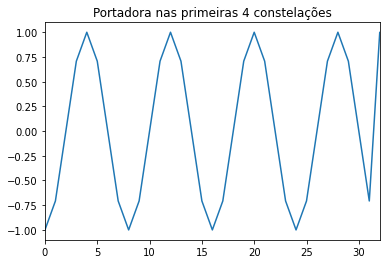

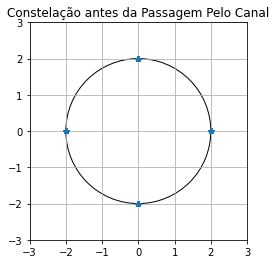

In [14]:
Eb = 4
indices_modulados = mod_QPSK(indicesBinarios_Hamming, Eb, P=8)

plt.plot(indices_modulados)
plt.xlim([0, 8*4])
plt.title("Portadora nas primeiras 4 constelações")
plt.show()

#Verificação da constelação antes de passar pelo canal
aux, x, y = desmod_QPSK(indices_modulados, P = 8)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y, '*')
circle = plt.Circle((0,0), np.sqrt(Eb), fill=False)
ax.add_patch(circle)
plt.title("Constelação antes da Passagem Pelo Canal")
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [15]:
# Passagem pelo Canal AWGN

pot_noise = 0.8

img_aposcanal = awgn(indices_modulados, pot_noise)

# SNR de Comunicação na banda do sinal
Sr = np.sum((img_aposcanal**2) / len(img_aposcanal))
SNRc = Sr / pot_noise

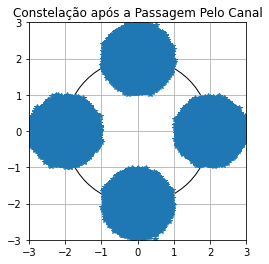

In [16]:
#Desmodulação

indices_desmodulados, x_desmod, y_desmod = desmod_QPSK(img_aposcanal, P = 8)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_desmod, y_desmod, '*')
circle = plt.Circle((0,0), np.sqrt(Eb), fill=False)
ax.add_patch(circle)
plt.title("Constelação após a Passagem Pelo Canal")
plt.xlim(-3,3)
plt.ylim(-3,3)
ax.set_aspect("equal", adjustable="box")
plt.grid()
plt.show()

In [17]:
mensagem_semcorr = np.concatenate([indices_desmodulados[(8*i):(8*i + 4)] for i in range(len(indices_desmodulados))])
BER_antesCorrecao = BER_pratico(indices_codific, mensagem_semcorr)

In [ ]:
# Deteção e Correção de Erros

indices_corrigidos = Detetor(indices_desmodulados)
indices_corrigidos = np.array(indices_corrigidos).flatten()

print("Primeira mensagem, originalmente: " + "".join([str(v) for v in indices_codific[0:4]]))
print("Mensagem recebida, sem correção: " + "".join([str(v) for v in mensagem_semcorr.astype(int)[0:4]]))
print("Mensagem recebida, após tentaivas de correção: " + "".join([str(v) for v in indices_corrigidos[0:4]]))

BER_aposCorrecao = BER_pratico(indices_codific, indices_corrigidos) # Obter o BER depois do uso do detetor

In [ ]:
# Descodificação

indices_descodificados = Descodific(indices_corrigidos, Q)
indices_descodificados_semcorr = Descodific(mensagem_semcorr.astype(int), Q)

#Verificação do primeiro valor obtido
print("indice em x[0] antes de passar pelo canal: " + str(indices[0]))
print("indice em x[0] depois da passagem pelo canal (c/correção): " + str(indices_descodificados[0]))
print("indice em x[0] depois da passagem pelo canal (s/correção): " + str(indices_descodificados_semcorr[0]))

In [ ]:
# Desquantificação

imagem_desquantificada = desquantificacao(indices_descodificados, Vq)
imagem_desquantificada_semcorr = desquantificacao(indices_descodificados_semcorr, Vq)

SNRp = Measure_SNRp(im_original, imagem_desquantificada)

In [ ]:
# Reconstrução

imagem_obtida = np.reshape(imagem_desquantificada, (512, 512, 3))

imagem_recetor = Image.fromarray(imagem_obtida.astype(np.uint8), 'RGB')
plt.imshow(imagem_recetor)
plt.title("Imagem Após Envio, com " + str(Q) + "Bits de Quantificação e Potência Ruído " + str(pot_noise) + " c/correção")
plt.show()

imagem_obtida_semcorr = np.reshape(imagem_desquantificada_semcorr, (512, 512, 3))

imagem_recetor_semcorr = Image.fromarray(imagem_obtida_semcorr.astype(np.uint8), 'RGB')
plt.imshow(imagem_recetor_semcorr)
plt.title("Imagem Após Envio, com " + str(Q) + "Bits de Quantificação e Potência Ruído " + str(pot_noise) + "s/correção")
plt.show()

In [ ]:
#Avaliação de BER e SNR obtidas

print("Resultados para Q=" + str(Q) + ", Potência de Ruido=" + str(pot_noise) + "e Eb= " + str(Eb))
print("Valores de SNR teórico: " + str(SNRt))
print("Valores de SNR prático: " + str(SNRp))
print("SNR do canal: " + str(10*np.log10(SNRc)))

In [ ]:
print("Resultados para Q=" + str(Q) + ", Potência de Ruido=" + str(pot_noise) + "e Eb=" + str(Eb))
print("Valores de BER antes da correção:" + str(BER_antesCorrecao))
print("Valores de BER depois da correção:" + str(BER_aposCorrecao))
print("BER teórico: " + str(BER_teorico(Eb, 2*pot_noise)))